<a href="https://colab.research.google.com/github/raynardj/python4ml/blob/master/experiments/emb_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embbedding Explain
> The simplest embedding explaination ever, period

Xiaochen(Raynard) Zhang

In [1]:
!pip install -Uqq fastai

     |████████████████████████████████| 186 kB 7.6 MB/s 
     |████████████████████████████████| 56 kB 2.1 MB/s 


In [2]:
import json
import random
from copy import deepcopy
from torch import nn
from tqdm.notebook import tqdm
from ipywidgets import interact
from fastai.vision.all import *

## Load data

In [4]:
data = json.loads("""
{
  "nodes": [
    {
      "name": "Myriel",
      "group": 1
    },
    {
      "name": "Napoleon",
      "group": 1
    },
    {
      "name": "Mlle.Baptistine",
      "group": 1
    },
    {
      "name": "Mme.Magloire",
      "group": 1
    },
    {
      "name": "CountessdeLo",
      "group": 1
    },
    {
      "name": "Geborand",
      "group": 1
    },
    {
      "name": "Champtercier",
      "group": 1
    },
    {
      "name": "Cravatte",
      "group": 1
    },
    {
      "name": "Count",
      "group": 1
    },
    {
      "name": "OldMan",
      "group": 1
    },
    {
      "name": "Labarre",
      "group": 2
    },
    {
      "name": "Valjean",
      "group": 2
    },
    {
      "name": "Marguerite",
      "group": 3
    },
    {
      "name": "Mme.deR",
      "group": 2
    },
    {
      "name": "Isabeau",
      "group": 2
    },
    {
      "name": "Gervais",
      "group": 2
    },
    {
      "name": "Tholomyes",
      "group": 3
    },
    {
      "name": "Listolier",
      "group": 3
    },
    {
      "name": "Fameuil",
      "group": 3
    },
    {
      "name": "Blacheville",
      "group": 3
    },
    {
      "name": "Favourite",
      "group": 3
    },
    {
      "name": "Dahlia",
      "group": 3
    },
    {
      "name": "Zephine",
      "group": 3
    },
    {
      "name": "Fantine",
      "group": 3
    },
    {
      "name": "Mme.Thenardier",
      "group": 4
    },
    {
      "name": "Thenardier",
      "group": 4
    },
    {
      "name": "Cosette",
      "group": 5
    },
    {
      "name": "Javert",
      "group": 4
    },
    {
      "name": "Fauchelevent",
      "group": 0
    },
    {
      "name": "Bamatabois",
      "group": 2
    },
    {
      "name": "Perpetue",
      "group": 3
    },
    {
      "name": "Simplice",
      "group": 2
    },
    {
      "name": "Scaufflaire",
      "group": 2
    },
    {
      "name": "Woman1",
      "group": 2
    },
    {
      "name": "Judge",
      "group": 2
    },
    {
      "name": "Champmathieu",
      "group": 2
    },
    {
      "name": "Brevet",
      "group": 2
    },
    {
      "name": "Chenildieu",
      "group": 2
    },
    {
      "name": "Cochepaille",
      "group": 2
    },
    {
      "name": "Pontmercy",
      "group": 4
    },
    {
      "name": "Boulatruelle",
      "group": 6
    },
    {
      "name": "Eponine",
      "group": 4
    },
    {
      "name": "Anzelma",
      "group": 4
    },
    {
      "name": "Woman2",
      "group": 5
    },
    {
      "name": "MotherInnocent",
      "group": 0
    },
    {
      "name": "Gribier",
      "group": 0
    },
    {
      "name": "Jondrette",
      "group": 7
    },
    {
      "name": "Mme.Burgon",
      "group": 7
    },
    {
      "name": "Gavroche",
      "group": 8
    },
    {
      "name": "Gillenormand",
      "group": 5
    },
    {
      "name": "Magnon",
      "group": 5
    },
    {
      "name": "Mlle.Gillenormand",
      "group": 5
    },
    {
      "name": "Mme.Pontmercy",
      "group": 5
    },
    {
      "name": "Mlle.Vaubois",
      "group": 5
    },
    {
      "name": "Lt.Gillenormand",
      "group": 5
    },
    {
      "name": "Marius",
      "group": 8
    },
    {
      "name": "BaronessT",
      "group": 5
    },
    {
      "name": "Mabeuf",
      "group": 8
    },
    {
      "name": "Enjolras",
      "group": 8
    },
    {
      "name": "Combeferre",
      "group": 8
    },
    {
      "name": "Prouvaire",
      "group": 8
    },
    {
      "name": "Feuilly",
      "group": 8
    },
    {
      "name": "Courfeyrac",
      "group": 8
    },
    {
      "name": "Bahorel",
      "group": 8
    },
    {
      "name": "Bossuet",
      "group": 8
    },
    {
      "name": "Joly",
      "group": 8
    },
    {
      "name": "Grantaire",
      "group": 8
    },
    {
      "name": "MotherPlutarch",
      "group": 9
    },
    {
      "name": "Gueulemer",
      "group": 4
    },
    {
      "name": "Babet",
      "group": 4
    },
    {
      "name": "Claquesous",
      "group": 4
    },
    {
      "name": "Montparnasse",
      "group": 4
    },
    {
      "name": "Toussaint",
      "group": 5
    },
    {
      "name": "Child1",
      "group": 10
    },
    {
      "name": "Child2",
      "group": 10
    },
    {
      "name": "Brujon",
      "group": 4
    },
    {
      "name": "Mme.Hucheloup",
      "group": 8
    }
  ],
  "links": [
    {
      "source": 1,
      "target": 0,
      "value": 1
    },
    {
      "source": 2,
      "target": 0,
      "value": 8
    },
    {
      "source": 3,
      "target": 0,
      "value": 10
    },
    {
      "source": 3,
      "target": 2,
      "value": 6
    },
    {
      "source": 4,
      "target": 0,
      "value": 1
    },
    {
      "source": 5,
      "target": 0,
      "value": 1
    },
    {
      "source": 6,
      "target": 0,
      "value": 1
    },
    {
      "source": 7,
      "target": 0,
      "value": 1
    },
    {
      "source": 8,
      "target": 0,
      "value": 2
    },
    {
      "source": 9,
      "target": 0,
      "value": 1
    },
    {
      "source": 11,
      "target": 10,
      "value": 1
    },
    {
      "source": 11,
      "target": 3,
      "value": 3
    },
    {
      "source": 11,
      "target": 2,
      "value": 3
    },
    {
      "source": 11,
      "target": 0,
      "value": 5
    },
    {
      "source": 12,
      "target": 11,
      "value": 1
    },
    {
      "source": 13,
      "target": 11,
      "value": 1
    },
    {
      "source": 14,
      "target": 11,
      "value": 1
    },
    {
      "source": 15,
      "target": 11,
      "value": 1
    },
    {
      "source": 17,
      "target": 16,
      "value": 4
    },
    {
      "source": 18,
      "target": 16,
      "value": 4
    },
    {
      "source": 18,
      "target": 17,
      "value": 4
    },
    {
      "source": 19,
      "target": 16,
      "value": 4
    },
    {
      "source": 19,
      "target": 17,
      "value": 4
    },
    {
      "source": 19,
      "target": 18,
      "value": 4
    },
    {
      "source": 20,
      "target": 16,
      "value": 3
    },
    {
      "source": 20,
      "target": 17,
      "value": 3
    },
    {
      "source": 20,
      "target": 18,
      "value": 3
    },
    {
      "source": 20,
      "target": 19,
      "value": 4
    },
    {
      "source": 21,
      "target": 16,
      "value": 3
    },
    {
      "source": 21,
      "target": 17,
      "value": 3
    },
    {
      "source": 21,
      "target": 18,
      "value": 3
    },
    {
      "source": 21,
      "target": 19,
      "value": 3
    },
    {
      "source": 21,
      "target": 20,
      "value": 5
    },
    {
      "source": 22,
      "target": 16,
      "value": 3
    },
    {
      "source": 22,
      "target": 17,
      "value": 3
    },
    {
      "source": 22,
      "target": 18,
      "value": 3
    },
    {
      "source": 22,
      "target": 19,
      "value": 3
    },
    {
      "source": 22,
      "target": 20,
      "value": 4
    },
    {
      "source": 22,
      "target": 21,
      "value": 4
    },
    {
      "source": 23,
      "target": 16,
      "value": 3
    },
    {
      "source": 23,
      "target": 17,
      "value": 3
    },
    {
      "source": 23,
      "target": 18,
      "value": 3
    },
    {
      "source": 23,
      "target": 19,
      "value": 3
    },
    {
      "source": 23,
      "target": 20,
      "value": 4
    },
    {
      "source": 23,
      "target": 21,
      "value": 4
    },
    {
      "source": 23,
      "target": 22,
      "value": 4
    },
    {
      "source": 23,
      "target": 12,
      "value": 2
    },
    {
      "source": 23,
      "target": 11,
      "value": 9
    },
    {
      "source": 24,
      "target": 23,
      "value": 2
    },
    {
      "source": 24,
      "target": 11,
      "value": 7
    },
    {
      "source": 25,
      "target": 24,
      "value": 13
    },
    {
      "source": 25,
      "target": 23,
      "value": 1
    },
    {
      "source": 25,
      "target": 11,
      "value": 12
    },
    {
      "source": 26,
      "target": 24,
      "value": 4
    },
    {
      "source": 26,
      "target": 11,
      "value": 31
    },
    {
      "source": 26,
      "target": 16,
      "value": 1
    },
    {
      "source": 26,
      "target": 25,
      "value": 1
    },
    {
      "source": 27,
      "target": 11,
      "value": 17
    },
    {
      "source": 27,
      "target": 23,
      "value": 5
    },
    {
      "source": 27,
      "target": 25,
      "value": 5
    },
    {
      "source": 27,
      "target": 24,
      "value": 1
    },
    {
      "source": 27,
      "target": 26,
      "value": 1
    },
    {
      "source": 28,
      "target": 11,
      "value": 8
    },
    {
      "source": 28,
      "target": 27,
      "value": 1
    },
    {
      "source": 29,
      "target": 23,
      "value": 1
    },
    {
      "source": 29,
      "target": 27,
      "value": 1
    },
    {
      "source": 29,
      "target": 11,
      "value": 2
    },
    {
      "source": 30,
      "target": 23,
      "value": 1
    },
    {
      "source": 31,
      "target": 30,
      "value": 2
    },
    {
      "source": 31,
      "target": 11,
      "value": 3
    },
    {
      "source": 31,
      "target": 23,
      "value": 2
    },
    {
      "source": 31,
      "target": 27,
      "value": 1
    },
    {
      "source": 32,
      "target": 11,
      "value": 1
    },
    {
      "source": 33,
      "target": 11,
      "value": 2
    },
    {
      "source": 33,
      "target": 27,
      "value": 1
    },
    {
      "source": 34,
      "target": 11,
      "value": 3
    },
    {
      "source": 34,
      "target": 29,
      "value": 2
    },
    {
      "source": 35,
      "target": 11,
      "value": 3
    },
    {
      "source": 35,
      "target": 34,
      "value": 3
    },
    {
      "source": 35,
      "target": 29,
      "value": 2
    },
    {
      "source": 36,
      "target": 34,
      "value": 2
    },
    {
      "source": 36,
      "target": 35,
      "value": 2
    },
    {
      "source": 36,
      "target": 11,
      "value": 2
    },
    {
      "source": 36,
      "target": 29,
      "value": 1
    },
    {
      "source": 37,
      "target": 34,
      "value": 2
    },
    {
      "source": 37,
      "target": 35,
      "value": 2
    },
    {
      "source": 37,
      "target": 36,
      "value": 2
    },
    {
      "source": 37,
      "target": 11,
      "value": 2
    },
    {
      "source": 37,
      "target": 29,
      "value": 1
    },
    {
      "source": 38,
      "target": 34,
      "value": 2
    },
    {
      "source": 38,
      "target": 35,
      "value": 2
    },
    {
      "source": 38,
      "target": 36,
      "value": 2
    },
    {
      "source": 38,
      "target": 37,
      "value": 2
    },
    {
      "source": 38,
      "target": 11,
      "value": 2
    },
    {
      "source": 38,
      "target": 29,
      "value": 1
    },
    {
      "source": 39,
      "target": 25,
      "value": 1
    },
    {
      "source": 40,
      "target": 25,
      "value": 1
    },
    {
      "source": 41,
      "target": 24,
      "value": 2
    },
    {
      "source": 41,
      "target": 25,
      "value": 3
    },
    {
      "source": 42,
      "target": 41,
      "value": 2
    },
    {
      "source": 42,
      "target": 25,
      "value": 2
    },
    {
      "source": 42,
      "target": 24,
      "value": 1
    },
    {
      "source": 43,
      "target": 11,
      "value": 3
    },
    {
      "source": 43,
      "target": 26,
      "value": 1
    },
    {
      "source": 43,
      "target": 27,
      "value": 1
    },
    {
      "source": 44,
      "target": 28,
      "value": 3
    },
    {
      "source": 44,
      "target": 11,
      "value": 1
    },
    {
      "source": 45,
      "target": 28,
      "value": 2
    },
    {
      "source": 47,
      "target": 46,
      "value": 1
    },
    {
      "source": 48,
      "target": 47,
      "value": 2
    },
    {
      "source": 48,
      "target": 25,
      "value": 1
    },
    {
      "source": 48,
      "target": 27,
      "value": 1
    },
    {
      "source": 48,
      "target": 11,
      "value": 1
    },
    {
      "source": 49,
      "target": 26,
      "value": 3
    },
    {
      "source": 49,
      "target": 11,
      "value": 2
    },
    {
      "source": 50,
      "target": 49,
      "value": 1
    },
    {
      "source": 50,
      "target": 24,
      "value": 1
    },
    {
      "source": 51,
      "target": 49,
      "value": 9
    },
    {
      "source": 51,
      "target": 26,
      "value": 2
    },
    {
      "source": 51,
      "target": 11,
      "value": 2
    },
    {
      "source": 52,
      "target": 51,
      "value": 1
    },
    {
      "source": 52,
      "target": 39,
      "value": 1
    },
    {
      "source": 53,
      "target": 51,
      "value": 1
    },
    {
      "source": 54,
      "target": 51,
      "value": 2
    },
    {
      "source": 54,
      "target": 49,
      "value": 1
    },
    {
      "source": 54,
      "target": 26,
      "value": 1
    },
    {
      "source": 55,
      "target": 51,
      "value": 6
    },
    {
      "source": 55,
      "target": 49,
      "value": 12
    },
    {
      "source": 55,
      "target": 39,
      "value": 1
    },
    {
      "source": 55,
      "target": 54,
      "value": 1
    },
    {
      "source": 55,
      "target": 26,
      "value": 21
    },
    {
      "source": 55,
      "target": 11,
      "value": 19
    },
    {
      "source": 55,
      "target": 16,
      "value": 1
    },
    {
      "source": 55,
      "target": 25,
      "value": 2
    },
    {
      "source": 55,
      "target": 41,
      "value": 5
    },
    {
      "source": 55,
      "target": 48,
      "value": 4
    },
    {
      "source": 56,
      "target": 49,
      "value": 1
    },
    {
      "source": 56,
      "target": 55,
      "value": 1
    },
    {
      "source": 57,
      "target": 55,
      "value": 1
    },
    {
      "source": 57,
      "target": 41,
      "value": 1
    },
    {
      "source": 57,
      "target": 48,
      "value": 1
    },
    {
      "source": 58,
      "target": 55,
      "value": 7
    },
    {
      "source": 58,
      "target": 48,
      "value": 7
    },
    {
      "source": 58,
      "target": 27,
      "value": 6
    },
    {
      "source": 58,
      "target": 57,
      "value": 1
    },
    {
      "source": 58,
      "target": 11,
      "value": 4
    },
    {
      "source": 59,
      "target": 58,
      "value": 15
    },
    {
      "source": 59,
      "target": 55,
      "value": 5
    },
    {
      "source": 59,
      "target": 48,
      "value": 6
    },
    {
      "source": 59,
      "target": 57,
      "value": 2
    },
    {
      "source": 60,
      "target": 48,
      "value": 1
    },
    {
      "source": 60,
      "target": 58,
      "value": 4
    },
    {
      "source": 60,
      "target": 59,
      "value": 2
    },
    {
      "source": 61,
      "target": 48,
      "value": 2
    },
    {
      "source": 61,
      "target": 58,
      "value": 6
    },
    {
      "source": 61,
      "target": 60,
      "value": 2
    },
    {
      "source": 61,
      "target": 59,
      "value": 5
    },
    {
      "source": 61,
      "target": 57,
      "value": 1
    },
    {
      "source": 61,
      "target": 55,
      "value": 1
    },
    {
      "source": 62,
      "target": 55,
      "value": 9
    },
    {
      "source": 62,
      "target": 58,
      "value": 17
    },
    {
      "source": 62,
      "target": 59,
      "value": 13
    },
    {
      "source": 62,
      "target": 48,
      "value": 7
    },
    {
      "source": 62,
      "target": 57,
      "value": 2
    },
    {
      "source": 62,
      "target": 41,
      "value": 1
    },
    {
      "source": 62,
      "target": 61,
      "value": 6
    },
    {
      "source": 62,
      "target": 60,
      "value": 3
    },
    {
      "source": 63,
      "target": 59,
      "value": 5
    },
    {
      "source": 63,
      "target": 48,
      "value": 5
    },
    {
      "source": 63,
      "target": 62,
      "value": 6
    },
    {
      "source": 63,
      "target": 57,
      "value": 2
    },
    {
      "source": 63,
      "target": 58,
      "value": 4
    },
    {
      "source": 63,
      "target": 61,
      "value": 3
    },
    {
      "source": 63,
      "target": 60,
      "value": 2
    },
    {
      "source": 63,
      "target": 55,
      "value": 1
    },
    {
      "source": 64,
      "target": 55,
      "value": 5
    },
    {
      "source": 64,
      "target": 62,
      "value": 12
    },
    {
      "source": 64,
      "target": 48,
      "value": 5
    },
    {
      "source": 64,
      "target": 63,
      "value": 4
    },
    {
      "source": 64,
      "target": 58,
      "value": 10
    },
    {
      "source": 64,
      "target": 61,
      "value": 6
    },
    {
      "source": 64,
      "target": 60,
      "value": 2
    },
    {
      "source": 64,
      "target": 59,
      "value": 9
    },
    {
      "source": 64,
      "target": 57,
      "value": 1
    },
    {
      "source": 64,
      "target": 11,
      "value": 1
    },
    {
      "source": 65,
      "target": 63,
      "value": 5
    },
    {
      "source": 65,
      "target": 64,
      "value": 7
    },
    {
      "source": 65,
      "target": 48,
      "value": 3
    },
    {
      "source": 65,
      "target": 62,
      "value": 5
    },
    {
      "source": 65,
      "target": 58,
      "value": 5
    },
    {
      "source": 65,
      "target": 61,
      "value": 5
    },
    {
      "source": 65,
      "target": 60,
      "value": 2
    },
    {
      "source": 65,
      "target": 59,
      "value": 5
    },
    {
      "source": 65,
      "target": 57,
      "value": 1
    },
    {
      "source": 65,
      "target": 55,
      "value": 2
    },
    {
      "source": 66,
      "target": 64,
      "value": 3
    },
    {
      "source": 66,
      "target": 58,
      "value": 3
    },
    {
      "source": 66,
      "target": 59,
      "value": 1
    },
    {
      "source": 66,
      "target": 62,
      "value": 2
    },
    {
      "source": 66,
      "target": 65,
      "value": 2
    },
    {
      "source": 66,
      "target": 48,
      "value": 1
    },
    {
      "source": 66,
      "target": 63,
      "value": 1
    },
    {
      "source": 66,
      "target": 61,
      "value": 1
    },
    {
      "source": 66,
      "target": 60,
      "value": 1
    },
    {
      "source": 67,
      "target": 57,
      "value": 3
    },
    {
      "source": 68,
      "target": 25,
      "value": 5
    },
    {
      "source": 68,
      "target": 11,
      "value": 1
    },
    {
      "source": 68,
      "target": 24,
      "value": 1
    },
    {
      "source": 68,
      "target": 27,
      "value": 1
    },
    {
      "source": 68,
      "target": 48,
      "value": 1
    },
    {
      "source": 68,
      "target": 41,
      "value": 1
    },
    {
      "source": 69,
      "target": 25,
      "value": 6
    },
    {
      "source": 69,
      "target": 68,
      "value": 6
    },
    {
      "source": 69,
      "target": 11,
      "value": 1
    },
    {
      "source": 69,
      "target": 24,
      "value": 1
    },
    {
      "source": 69,
      "target": 27,
      "value": 2
    },
    {
      "source": 69,
      "target": 48,
      "value": 1
    },
    {
      "source": 69,
      "target": 41,
      "value": 1
    },
    {
      "source": 70,
      "target": 25,
      "value": 4
    },
    {
      "source": 70,
      "target": 69,
      "value": 4
    },
    {
      "source": 70,
      "target": 68,
      "value": 4
    },
    {
      "source": 70,
      "target": 11,
      "value": 1
    },
    {
      "source": 70,
      "target": 24,
      "value": 1
    },
    {
      "source": 70,
      "target": 27,
      "value": 1
    },
    {
      "source": 70,
      "target": 41,
      "value": 1
    },
    {
      "source": 70,
      "target": 58,
      "value": 1
    },
    {
      "source": 71,
      "target": 27,
      "value": 1
    },
    {
      "source": 71,
      "target": 69,
      "value": 2
    },
    {
      "source": 71,
      "target": 68,
      "value": 2
    },
    {
      "source": 71,
      "target": 70,
      "value": 2
    },
    {
      "source": 71,
      "target": 11,
      "value": 1
    },
    {
      "source": 71,
      "target": 48,
      "value": 1
    },
    {
      "source": 71,
      "target": 41,
      "value": 1
    },
    {
      "source": 71,
      "target": 25,
      "value": 1
    },
    {
      "source": 72,
      "target": 26,
      "value": 2
    },
    {
      "source": 72,
      "target": 27,
      "value": 1
    },
    {
      "source": 72,
      "target": 11,
      "value": 1
    },
    {
      "source": 73,
      "target": 48,
      "value": 2
    },
    {
      "source": 74,
      "target": 48,
      "value": 2
    },
    {
      "source": 74,
      "target": 73,
      "value": 3
    },
    {
      "source": 75,
      "target": 69,
      "value": 3
    },
    {
      "source": 75,
      "target": 68,
      "value": 3
    },
    {
      "source": 75,
      "target": 25,
      "value": 3
    },
    {
      "source": 75,
      "target": 48,
      "value": 1
    },
    {
      "source": 75,
      "target": 41,
      "value": 1
    },
    {
      "source": 75,
      "target": 70,
      "value": 1
    },
    {
      "source": 75,
      "target": 71,
      "value": 1
    },
    {
      "source": 76,
      "target": 64,
      "value": 1
    },
    {
      "source": 76,
      "target": 65,
      "value": 1
    },
    {
      "source": 76,
      "target": 66,
      "value": 1
    },
    {
      "source": 76,
      "target": 63,
      "value": 1
    },
    {
      "source": 76,
      "target": 62,
      "value": 1
    },
    {
      "source": 76,
      "target": 48,
      "value": 1
    },
    {
      "source": 76,
      "target": 58,
      "value": 1
    }
  ]
}
""")

## What the data looks like
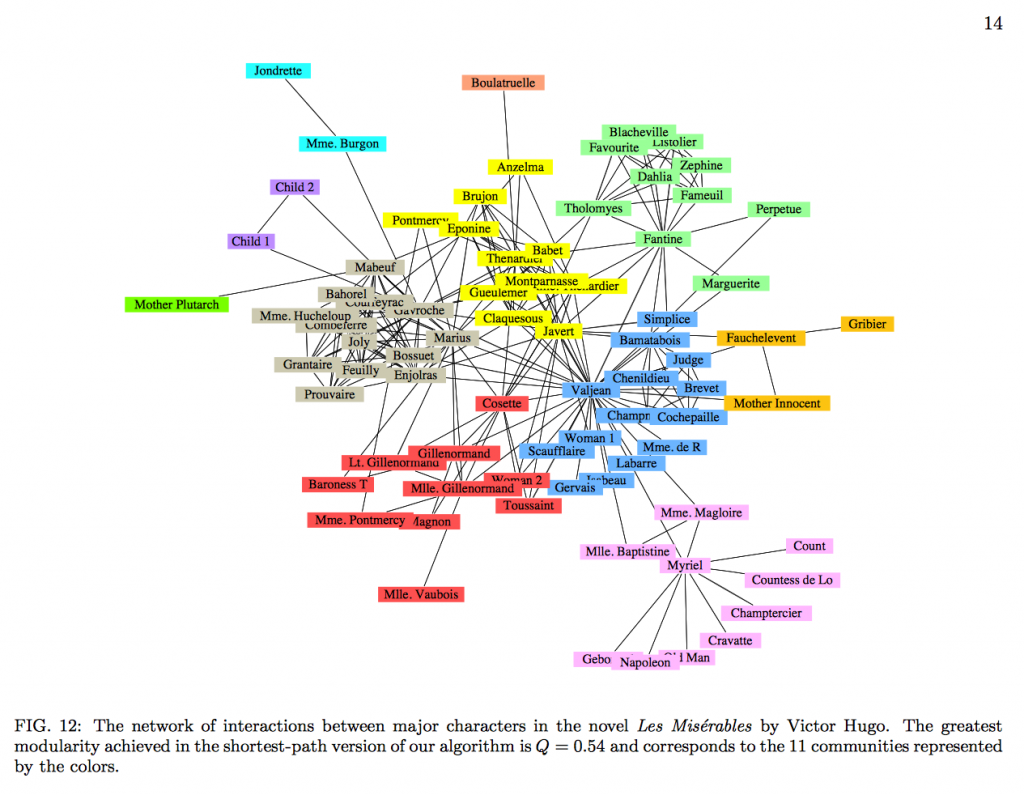

## Helper function and class

In [5]:
class Character:
    everyone = []
    everylink = dict()
    def __init__(self, **node):
        for k,v in node.items():
            setattr(self, k ,v)
        self.everyone.append(self)
        self.idx = len(self.everyone)-1
        self.relation = []
    
    def __repr__(self):
        return f"[# {self.idx}]{self.name}(group:{self.group})"
    
    def has_relation(self, other):
        ids = "_".join(list(map(str, sorted([self.idx, other.idx]))))
        if ids not in self.everylink:
            return 0
        return self.everylink[ids]
    
def initialize(data):
    Character.everyone = []
    nodes = list(Character(**node) for node in data['nodes'])
    Character.everylink = dict()
    for link in data['links']:
        id1 = link['source']
        id2 = link['target']
        idkey = '_'.join(list(map(str, sorted([id1, id2]))))
        Character.everylink[idkey] = link['value']
    return nodes

nodes = initialize(data)
names=list(map(lambda n:n.name, nodes))

class GraphData:
    def __init__(self, length):
        self.length=length
        
    def __len__(self):return self.length
    
    def __getitem__(self, idx):
        node1, node2 = random.choices(nodes,k=2)
        relation = node1.has_relation(node2)
        return {"x":[node1.idx,node2.idx], "y":0 if relation>0 else 2}
    
def visualize_people(nodes, weights, grads=None):
    colors = ['tomato','green','darkblue','darkorchid','cyan',
              'darkorange','slategray','crimson','olive','blue','black']
    plt.figure(figsize=(10,10),)
    X = weights[:,0]
    Y = weights[:,1]
    plt.scatter(X, Y)
    if grads is None:
        grads = [[0, 0],]*len(nodes)
    for node, x, y, grad in zip(nodes, X, Y, grads):
        plt.text(x, y, node.name, color=colors[node.group])
        if sum(grad)!=0:
            plt.arrow(x, y, grad[0], grad[1],
                      color=colors[node.group],
                      shape='full', width=0.02)
    plt.show()

## Dataset

In [6]:
node1 = nodes[23]
node2 = nodes[9]
node1, node2

([# 23]Fantine(group:3), [# 9]OldMan(group:1))

What's a batch look like

In [7]:
dataset = GraphData(100)
dls = DataLoaders.from_dsets(dataset,bs=1)
batch = dls.one_batch()

batch['x'], batch['y']

([tensor([43]), tensor([36])], tensor([2]))

## create a mutable coordinate system

For 77 person, each person have 2 numbers for coordinates

In [8]:
embedding = nn.Embedding(len(nodes),2)
embedding

Embedding(77, 2)

For now the coordinates are generated randomly

It means, for now, everyone's location on map is random

In [9]:
for node, coord in zip(nodes[:15], embedding.weight.data.numpy()[:15]):
    print(f"{node.name}'s coordinates are {coord}")

Myriel's coordinates are [ 0.11284354 -0.8321564 ]
Napoleon's coordinates are [0.35870376 0.09270766]
Mlle.Baptistine's coordinates are [ 0.10179452 -0.29043484]
Mme.Magloire's coordinates are [-0.8703893 -0.5555402]
CountessdeLo's coordinates are [0.5750995 1.0400212]
Geborand's coordinates are [0.32502428 0.15624955]
Champtercier's coordinates are [0.12793617 0.47072747]
Cravatte's coordinates are [-0.18535648  1.5690378 ]
Count's coordinates are [ 0.94556147 -0.7261254 ]
OldMan's coordinates are [ 0.05504081 -0.00705853]
Labarre's coordinates are [ 0.8190793  -0.80530465]
Valjean's coordinates are [-1.773031    0.23172484]
Marguerite's coordinates are [1.5678433  0.83247715]
Mme.deR's coordinates are [-2.057469    0.55271375]
Isabeau's coordinates are [ 0.83736235 -0.7562771 ]


Visualize the coordinate system with people's name.

Like I said, people stands on a map, with **random location** for now

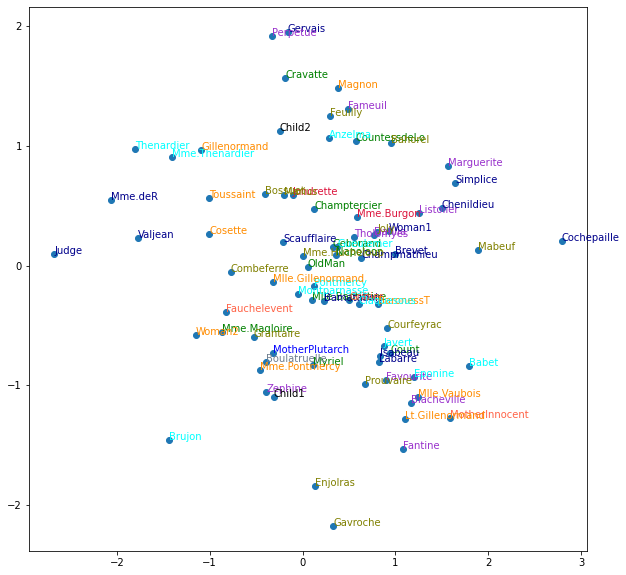

In [10]:
visualize_people(nodes, embedding.weight.data.numpy())

For pytorch syntax, embedding is just a modulelized layer, that can extract the coordinates by index

In [11]:
idx1 = batch['x'][0]
vec1 = embedding(idx1)

print(f"index:\t{idx1}\tcoordinate vector:\t{vec1}")

index:	tensor([43])	coordinate vector:	tensor([[-1.1485, -0.5815]], grad_fn=<EmbeddingBackward>)


In [12]:
idx2 = batch['x'][1]
vec2 = embedding(idx2)

print(f"index:\t{idx2}\tcoordinate vector:\t{vec2}")

index:	tensor([36])	coordinate vector:	tensor([[0.9927, 0.0976]], grad_fn=<EmbeddingBackward>)


## Measure distance

How do we present **How far these 2 people are?**

By measuring their distance between their coordinates.

Mess with complicated model we should not, but only play with simple distance function you have to be familiar with: Euclidean distance

$D=\sqrt{(x_{2}-x_{1})^{2}+(y_{2}-y_{1})^{2}}$

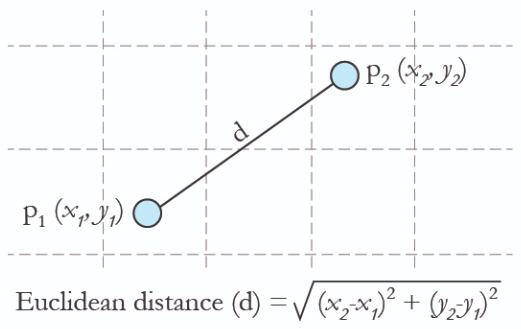

In [14]:
def eu_distance(a, b):
    """
    Euclidean distance between 2 points: a and b, no matter how many dimension
    """
    return torch.pow(a-b,2).sum().sqrt()

In [15]:
eu_distance(torch.Tensor([3,4]),torch.Tensor([0,0]))

tensor(5.)

## Train the model
> As the "model" is our **coordinates for our characters**

In [16]:
# create our coordinate locations anew, randomly
embedding = nn.Embedding(len(nodes),2,)
# loss function
crit = nn.MSELoss()
# optimizer, notice, embedding here is the entirety of model
opt = torch.optim.SGD(embedding.parameters(), lr=1e-1)

# to record process for visualization later
all_weights = []
all_grad = []

# move the dots for 10000 times, with progress bar
for i in tqdm(range(10000)):
    opt.zero_grad()
    # get a batch of data
    batch = dls.one_batch()
    
    # a random people
    x1 = batch['x'][0]
    # another random people
    x2 = batch['x'][1]
    # are they related, yes? (0), or not? (2)
    y = batch['y']
    
    # coordinate for people #1
    vec1 = embedding(x1)
    # coordinate for people #2
    vec2 = embedding(x2)
    # distance between 2 coordinates now
    distance = eu_distance(vec1, vec2)
    
    # 'the distance NOW' vs 'relation(IDEAL DISTANCE)'
    # the difference should be as little as possible
    loss = crit(distance, y.float())
    loss.backward()
    
    # record the progress
    if embedding.weight.grad.isnan().sum()>0:
        continue

    weights = deepcopy(embedding.weight.data.numpy())
    grads = deepcopy(embedding.weight.grad.data.numpy())
    if i<20:
        all_weights.append(weights)
        all_grad.append(grads)
        
    # move the involved dots according to direction (gradient)
    opt.step()

  0%|          | 0/10000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## Visualize moving step by step

In [17]:
@interact
def show_charactors(idx=(0,len(all_weights)-1)):
    weights = all_weights[idx]
    grads = all_grad[idx]
    # optimizer move by weights = weights-grads * learning_rate
    # this is why we use -grads*0.2 to visualize the moving arrow
    visualize_people(nodes,weights,-grads*0.2)

    weights_df = pd.DataFrame({'names':names, "x":weights[:,0],"y":weights[:,1]})
    grad_df = pd.DataFrame({'names':names, "x":grads[:,0],"y":grads[:,1]}).query('x!=0')
    display(grad_df)

interactive(children=(IntSlider(value=9, description='idx', max=18), Output()), _dom_classes=('widget-interact…

## After 10000 times of moving

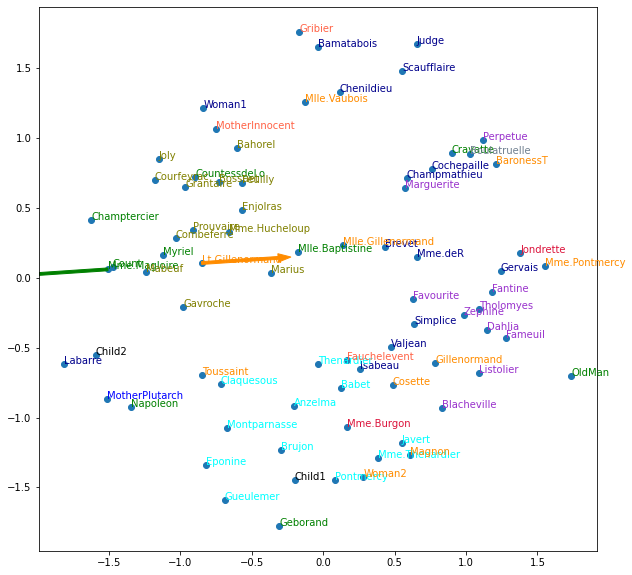

In [18]:
visualize_people(nodes,weights,-grads*0.2)